In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\hi\anaconda3\envs\con\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Score :", score)
coefficient = model.coef_
intercept = model.intercept_
print("Coefficient :\n", coefficient)
print()
print("Intercept :\n", intercept)

Score : 0.8970935543505252
Coefficient :
 [-1.07353509e-01  3.05111356e-02 -1.08333885e-01  4.16629102e-02
  4.71288107e-06  1.51115009e-01 -3.61927185e-01 -3.12505704e-01
  4.29064479e-02  8.02169351e-02 -1.41471515e-01 -2.80505337e-01
 -7.16493902e-04]

Intercept :
 3.1308171889730003


In [3]:
from sklearn.datasets import load_diabetes

dia =  load_diabetes()
xTrain, xTest, yTrain, yTest = train_test_split(
    dia.data, dia.target, random_state=42)

In [4]:
# ridge: 계수를 줄이지만 0은 x, 과적합을 방지
# L2(제곱합)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) # 하이퍼 파라미터
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.8970041376890789

In [5]:
# Lasso: 중요하지 않은 변수의 계수를 0으로 만듦, 과적합 방지, 
# 중요하지 않은 변수는 의미가 없어지며, 나머지 변수들에서 다중공선성에 취약해짐
# L1(절댓값합)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.43569147115072915

In [6]:
from sklearn.linear_model import ElasticNet
# elastic은 중요하지 않은 변수는 0으로 만든다.
# L1 + L2 => 줄이는 것과 0으로 만드는 것의 중간 형태 , 타원도아니고 선형도 아님
# l1_ratio = 중간값

elastic =  ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic.fit(X_train, y_train)
elastic.score(X_test, y_test)


0.5925227297358058

In [7]:
# 선형 회귀 모델과 비교하기 위함
linear = LinearRegression()
linear.fit(X_train, y_train)

# 계수를 한 눈에 비교하기 위한 DataFrame
coefs = np.vstack(
    (linear.coef_, ridge.coef_, lasso.coef_, elastic.coef_)
)
index = ['linear', 'ridge', 'lasso', 'elastic']
coefs_df = pd.DataFrame(coefs, columns=data.feature_names, index=index)
print("정규화 선형회귀 모델별 가중치(계수) 비교")
coefs_df

정규화 선형회귀 모델별 가중치(계수) 비교


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
linear,-0.107354,0.030511,-0.108334,0.041663,0.000005,0.151115,-0.361927,-0.312506,0.042906,0.080217,-0.141472,-0.280505,-0.000716
ridge,-0.106429,0.031653,-0.115558,0.040570,0.000351,0.126918,-0.343514,-0.171764,0.035925,0.082059,-0.125809,-0.267904,-0.000728
lasso,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.001561
elastic,-0.000000,0.000000,0.000000,0.003453,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.062010,-0.000000,-0.000000,-0.001688


In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dataset = load_iris()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X_train, X_test, y_train, y_test = train_test_split(data, dataset.target,
                                                    random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [11]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test_scaled)
scoreXTrain = accuracy_score(y_test, pred)
scoreXTrain

0.9736842105263158

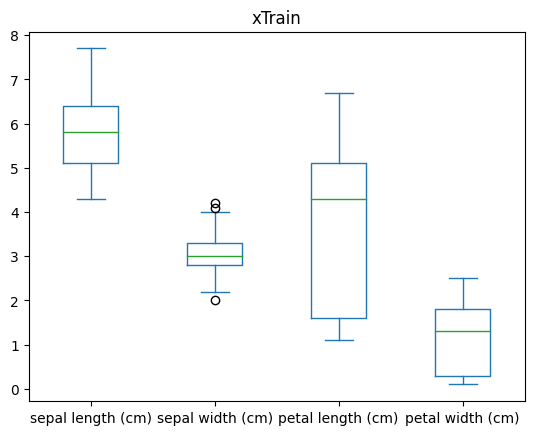

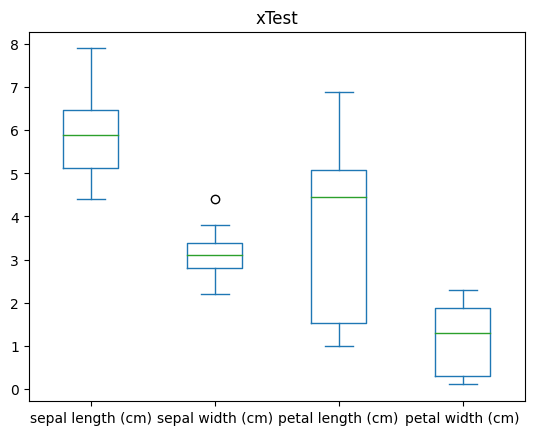

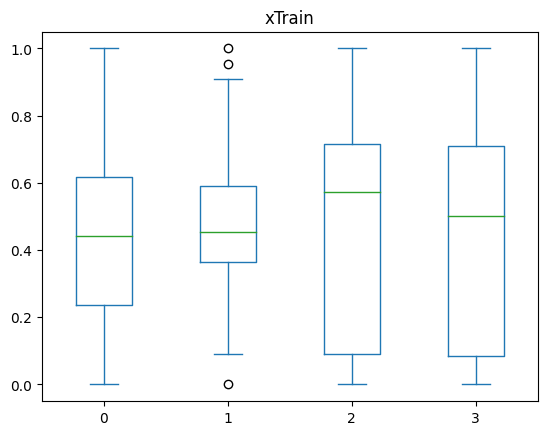

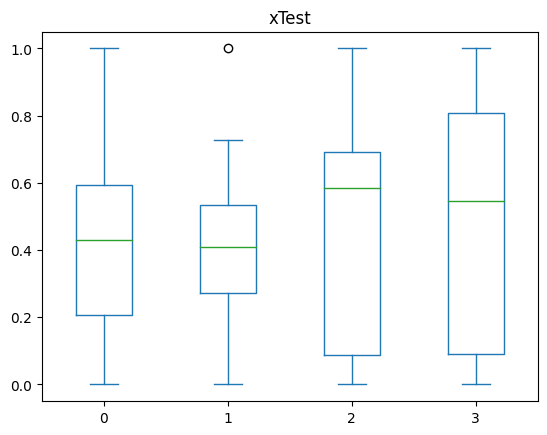

In [12]:
X_train.plot(kind="box")
plt.title("xTrain")
plt.show()

X_test.plot(kind="box")
plt.title("xTest")
plt.show()

pd.DataFrame(X_train_scaled).plot(kind="box")
plt.title("xTrain")
plt.show()

pd.DataFrame(X_test_scaled).plot(kind="box")
plt.title("xTest")
plt.show()

In [13]:
# 과제: bicycle 예제를 Ridge/Lasso/ElasticNet로 바꿔서 실행해봐라

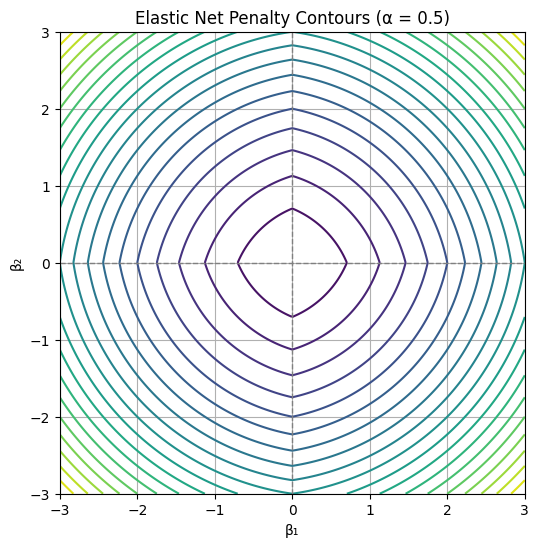

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid
beta1 = np.linspace(-3, 3, 400)
beta2 = np.linspace(-3, 3, 400)
B1, B2 = np.meshgrid(beta1, beta2)

# Penalty terms
lasso = np.abs(B1) + np.abs(B2)      # L1 norm
ridge = B1**2 + B2**2                # L2 norm
elastic = 0.5 * lasso + 0.5 * ridge  # Elastic Net penalty (alpha = 0.5)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
cp = ax.contour(B1, B2, elastic, levels=20, cmap='viridis')
ax.set_title("Elastic Net Penalty Contours (α = 0.5)")
ax.set_xlabel("β₁")
ax.set_ylabel("β₂")
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

In [15]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

dataset = load_breast_cancer()
train = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=['cancer'])
data = pd.concat([train,target], axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(data[['mean radius']],
                                                data[['cancer']],
                                                random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear')
model.fit(xTrain, yTrain)

c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [18]:
from sklearn.metrics import accuracy_score

pred = model.predict(xTest)
accuracy_score(yTest, pred)
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1]


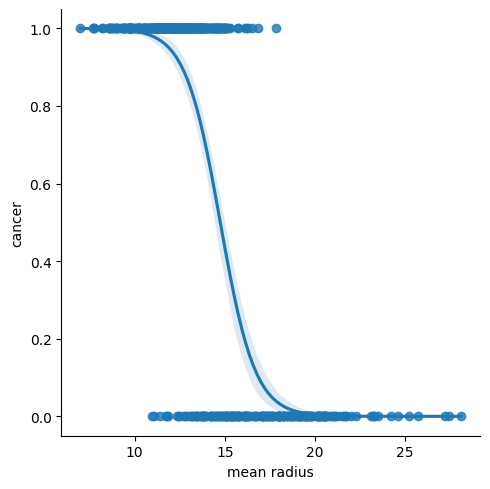

In [19]:
from seaborn import lmplot
lmplot(x='mean radius', y='cancer', data=data, logistic=True)
plt.show()

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(data.loc[:,:'cancer'],
                                                data.loc[:,'cancer'],
                                                random_state=42)
model.fit(xTrain, yTrain)
socre = model.score(xTest, yTest)
print({score})

{0.8970935543505252}


In [21]:
# 지니 계수는 데이터 양이 적고, 데이터 종류가 다양할 때 쓰면 좋음
# ㄴ값이 작을수록 잘 분류된 것
# 엔트로피 계수는 데이터 양이 많고, 데이터 종류가 적을 때 사용하면 좋음
# ㄴ값이 작을수록 잘 분류된 것

In [22]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
prep_data = data.drop(columns=['alive','who','adult_male','class','embark_town'])
prep_data.drop('deck', axis=1, inplace=True)
prep_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [24]:
prep_data = prep_data.dropna().reset_index(drop=True)
prep_data.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked  alone
0           0       3    male  22.0      1      0   7.2500        S  False
1           1       1  female  38.0      1      0  71.2833        C  False
2           1       3  female  26.0      0      0   7.9250        S   True
3           1       1  female  35.0      1      0  53.1000        S  False
4           0       3    male  35.0      0      0   8.0500        S   True
..        ...     ...     ...   ...    ...    ...      ...      ...    ...
707         0       3  female  39.0      0      5  29.1250        Q  False
708         0       2    male  27.0      0      0  13.0000        S   True
709         1       1  female  19.0      0      0  30.0000        S   True
710         1       1    male  26.0      0      0  30.0000        C   True
711         0       3    male  32.0      0      0   7.7500        Q   True

[712 rows x 9 columns]>

In [25]:
from sklearn.preprocessing import LabelEncoder
# maie = 0, female = 1로 변환 => one hot encoding
le = LabelEncoder()
prep_data['sex'] = le.fit_transform(prep_data['sex'])
prep_data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
707,0,3,0,39.0,0,5,29.125,Q,False
708,0,2,1,27.0,0,0,13.000,S,True
709,1,1,0,19.0,0,0,30.000,S,True
710,1,1,1,26.0,0,0,30.000,C,True
711,0,3,1,32.0,0,0,7.750,Q,True


In [26]:
from sklearn.preprocessing import OneHotEncoder

embarked_unique = prep_data.embarked.unique()
print(embarked_unique)

ohe = OneHotEncoder()
# fancy indexing은 DataFrame을 반환
embarked_df = prep_data[['embarked']]

# OneHotEncoder는 DataFrame만 입력 가능
ohe.fit(embarked_df)
embarked_ohe = ohe.transform(embarked_df)
embarked_ohe

['S' 'C' 'Q']


<712x3 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

In [27]:
embarkd_df = pd.DataFrame(embarked_ohe.toarray(),
                           columns=embarked_unique)
embarkd_df.sample(5)

,S,C,Q
296,0.0,0.0,1.0
351,0.0,0.0,1.0
551,0.0,0.0,1.0
363,1.0,0.0,0.0
498,0.0,0.0,1.0


In [28]:
prep_data = pd.concat([prep_data, embarked_df], axis = 1)
prep_data = prep_data.drop('embarked', axis=1)
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,alone
0,0,3,1,22.0,1,0,7.2500,False
1,1,1,0,38.0,1,0,71.2833,False
2,1,3,0,26.0,0,0,7.9250,True
3,1,1,0,35.0,1,0,53.1000,False
4,0,3,1,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,False
708,0,2,1,27.0,0,0,13.0000,True
709,1,1,0,19.0,0,0,30.0000,True
710,1,1,1,26.0,0,0,30.0000,True


In [29]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(prep_data.iloc[:,1:],
                                                prep_data.iloc[:,0],
                                                random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier

# 하이퍼 파라미터, 가지치기
model = DecisionTreeClassifier(max_depth=2)
model.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=2)

In [31]:
score  = model.score(xTest, yTest)
print("정확도: ", score)

정확도:  0.7584269662921348


피처 중요도:
 [0.29899614 0.70100386 0.         0.         0.         0.
 0.        ]


(-1.0, 7.0)

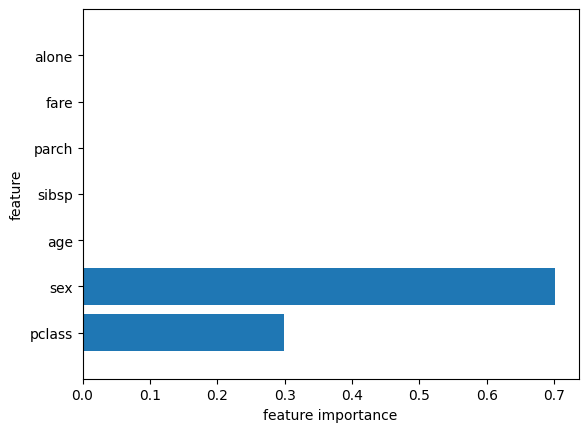

In [32]:
import numpy as np

print('피처 중요도:\n', model.feature_importances_)
n_features = xTrain.shape[1]
plt.barh(np.arange(n_features),
         model.feature_importances_,
         align='center')
plt.yticks(np.arange(n_features), xTrain.columns)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.ylim(-1, n_features)

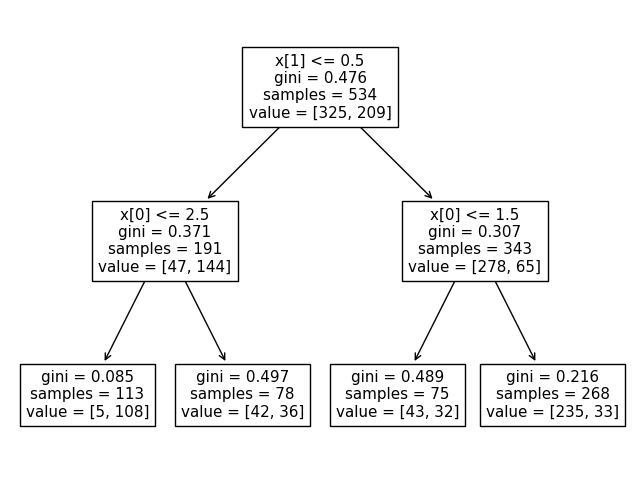

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8,6))
plot_tree(model.fit(xTrain, yTrain))

plt.show()

In [34]:
import numpy as np
from sklearn import svm

x = np.array([[0,0],[1,1]])
y = [0, 1]
LinearSVM = svm.LinearSVC()
LinearSVM.fit(x, y)
print("penalty = 12")
print(LinearSVM.coef_[0])
print(LinearSVM.intercept_[0])
LinearSVM.predict([[2,2]])


penalty = 12
[0.58822994 0.58822994]
-0.4705748577631975


c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([1])

In [35]:
# 위의 weight는 페널티 12로 학습한 결과

LinearSVM.set_params(penalty = "l1") #, dual=False)
# LinearSVM.fit(x, y) # 학습 비용 추가
print("penalty = l1")
print(LinearSVM.coef_[0])
print(LinearSVM.intercept_[0])


penalty = l1
[0.58822994 0.58822994]
-0.4705748577631975


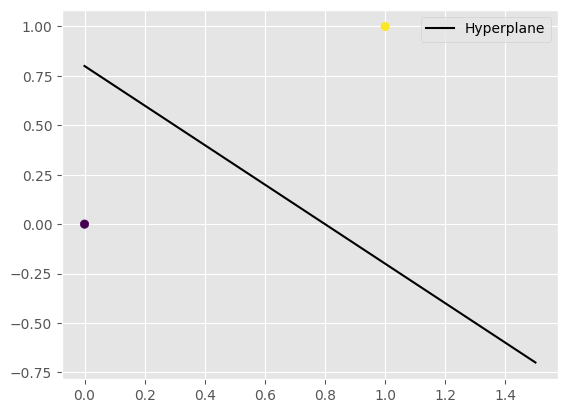

In [36]:
# 위의 weight는 그대로 하이퍼파라메터 한개(페널티)만 값을 바꾼(조작) 경우

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
w = LinearSVM.coef_[0]
b = LinearSVM.intercept_[0]
slop = -w[0] /w[1]
xx = np.linspace(0, 1.5)
yy = slop * xx - b/w[1]
h0 = plt.plot(xx, yy, "k-", label="Hyperplane")
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.legend()
plt.show()

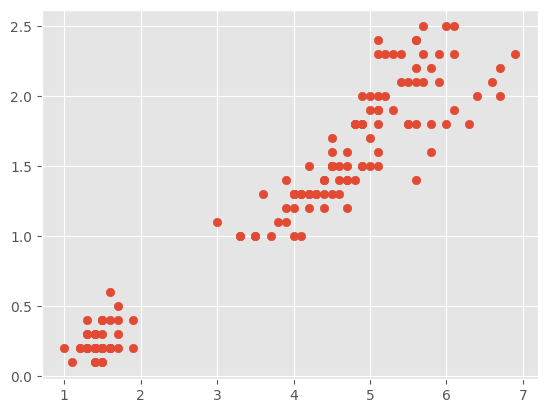

In [37]:
import math
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(
    iris_data, columns=iris.feature_names)
petals = pd.DataFrame(iris_data_pd.values[:, 2:4], 
           columns=["petal length (cm)", "petal width (cm)"])
plt.scatter(petals.values[:,0], petals.values[:,1])
plt.show()

c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


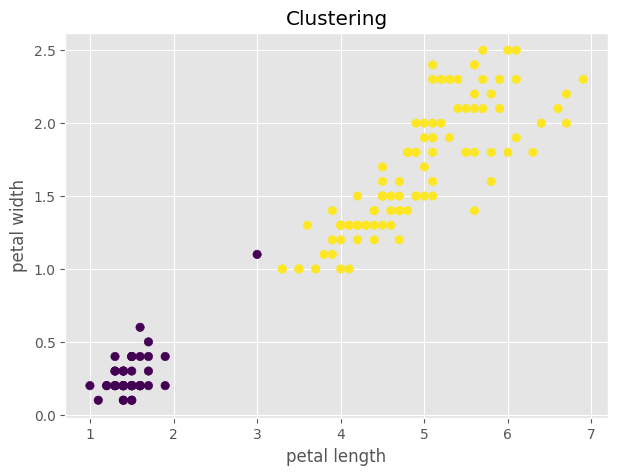

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64
[[1.49215686 0.2627451 ]
 [4.92525253 1.68181818]]


In [38]:
from sklearn.cluster import KMeans
plt.figure(figsize=(7, 5))
km = KMeans(n_clusters=2, random_state=20)
km.fit(iris_data_pd.iloc[:, 2:4])
yPred = km.predict(iris_data_pd.iloc[:, 2:4])
plt.scatter(iris_data_pd.iloc[:,2], 
            iris_data_pd.iloc[:, 3], c=yPred)
plt.title("Clustering")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()
km.predict(iris_data_pd.iloc[:, 2:4])
print(iris_data_pd.iloc[98, 2:4])
print(km.cluster_centers_)

In [39]:
def distance(x1,y1,x2,y2):
    dx = x2 - x1
    dy = y2 - y1
    squared = dx ** 2 + dy ** 2
    result = math.sqrt(squared)
    return result

print("0 cluster distance : ",
      distance(iris_data_pd.iloc[98,2],iris_data_pd.iloc[98,3],
               km.cluster_centers_[0][0],km.cluster_centers_[0][1]))

print(" 1 cluster distance : " ,
      distance(iris_data_pd.iloc[98,2],iris_data_pd.iloc[98,3],
               km.cluster_centers_[1][0],km.cluster_centers_[1][1]))

0 cluster distance :  1.7246990164733285
 1 cluster distance :  2.0112458036464465


c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


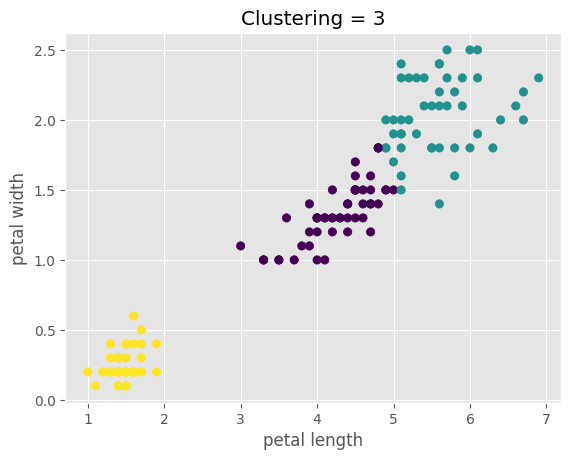

c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


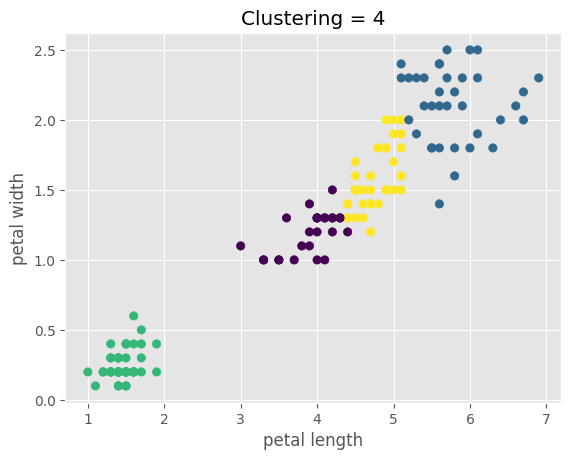

c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


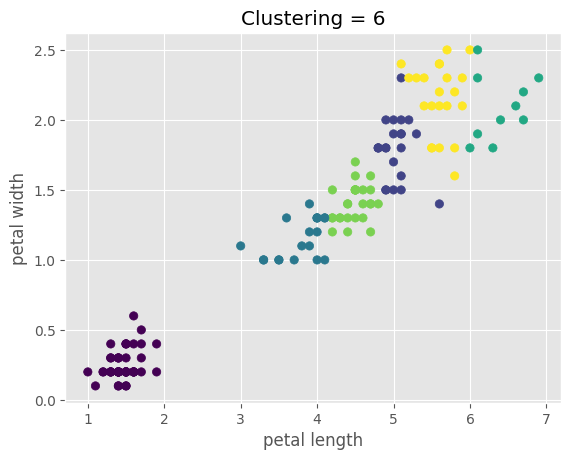

c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


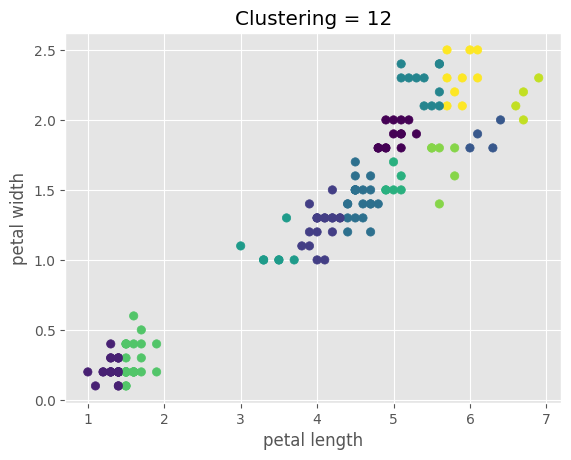

In [40]:
n_cluster = [3,4,6,12]

for i in n_cluster:
    count = 1
    km = KMeans(n_clusters= i, random_state=20)

    km.fit(iris_data_pd.iloc[:,2:4])
    y_pred = km.predict(iris_data_pd.iloc[:,2:4])
    plt.figure(count)
    plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
    plt.title("Clustering = " + str(i))
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    count = count + 1
    plt.show()

c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


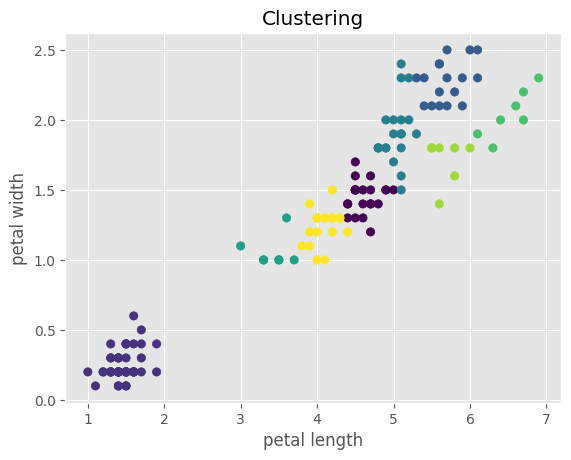

c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(-0.9, 3.5)

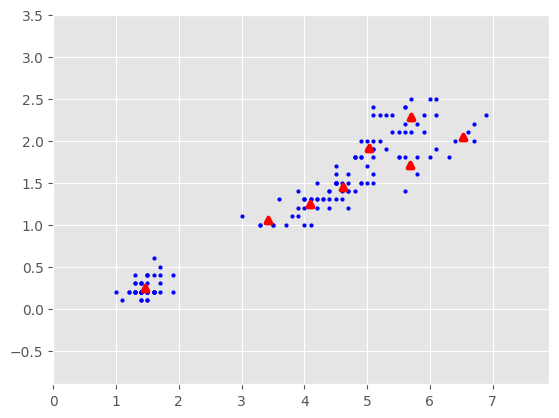

In [41]:
km12 = KMeans(n_clusters= 8, random_state=20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])
plt.title("Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
graph1 = plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c= y_pred12)
plt.show()


h = .02  # point in the mesh [x_min, x_max]x[y_min, y_max].

km12 = KMeans(n_clusters= 8, random_state=20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = iris_data_pd.iloc[:, 2].min() - 1, iris_data_pd.iloc[:, 2].max() + 1
y_min, y_max = iris_data_pd.iloc[:, 3].min() - 1, iris_data_pd.iloc[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.plot(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], 'bo',
         markersize=2)

# Plot the centroids as a white X
centroids = km12.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='^', s=16, linewidths=3,
            color='r', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

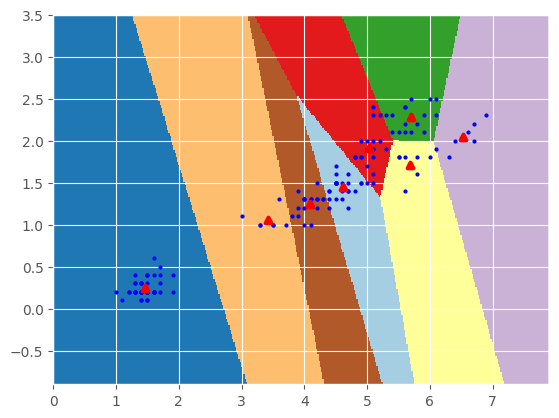

In [42]:
# Obtain labels for each point in mesh. Use last trained model.
Z = km12.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], 'bo',
         markersize=2)

# Plot the centroids as a white X
centroids = km12.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='^', s=16, linewidths=3,
            color='r', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show

c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\hi\anaconda3\envs\con\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


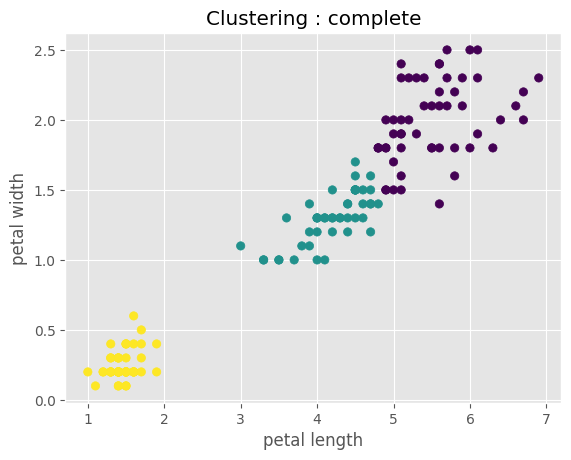

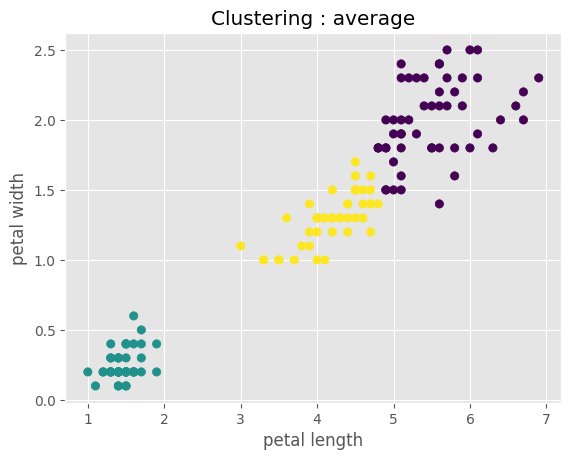

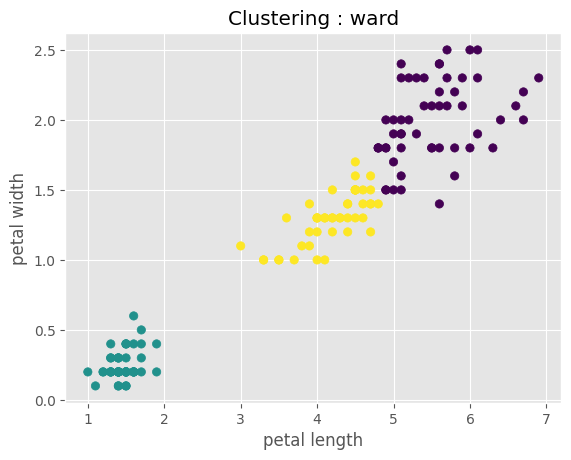

In [43]:

iris = load_iris()
from sklearn.cluster import AgglomerativeClustering
linkage =['complete', 'average', 'ward']
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                   linkage=i)
    hier.fit(iris_data_pd.iloc[:,2:4])
    plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3],c=hier.labels_)
    plt.title('Clustering : '+i)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
plt.show()
    

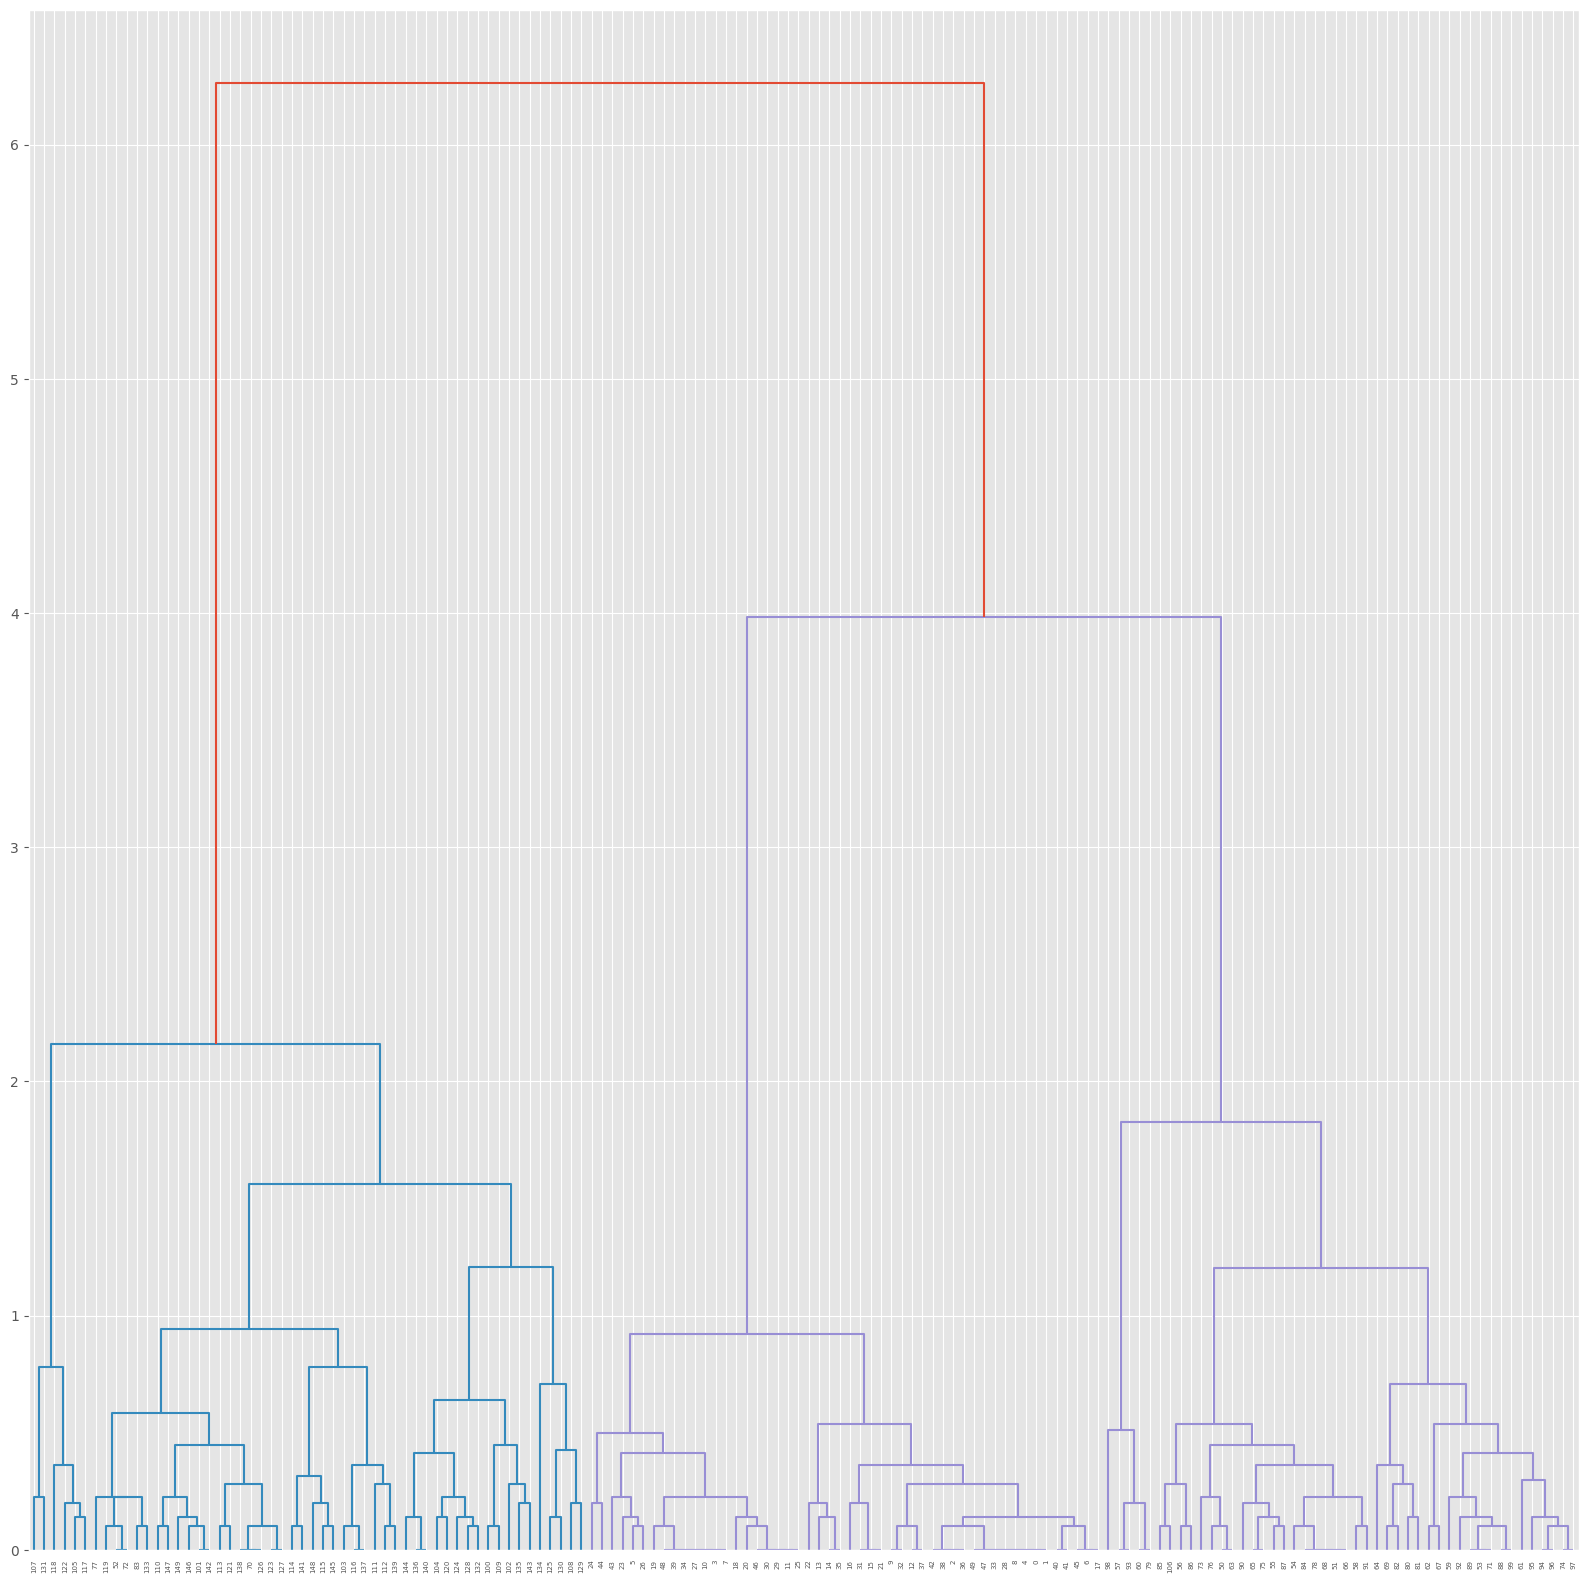

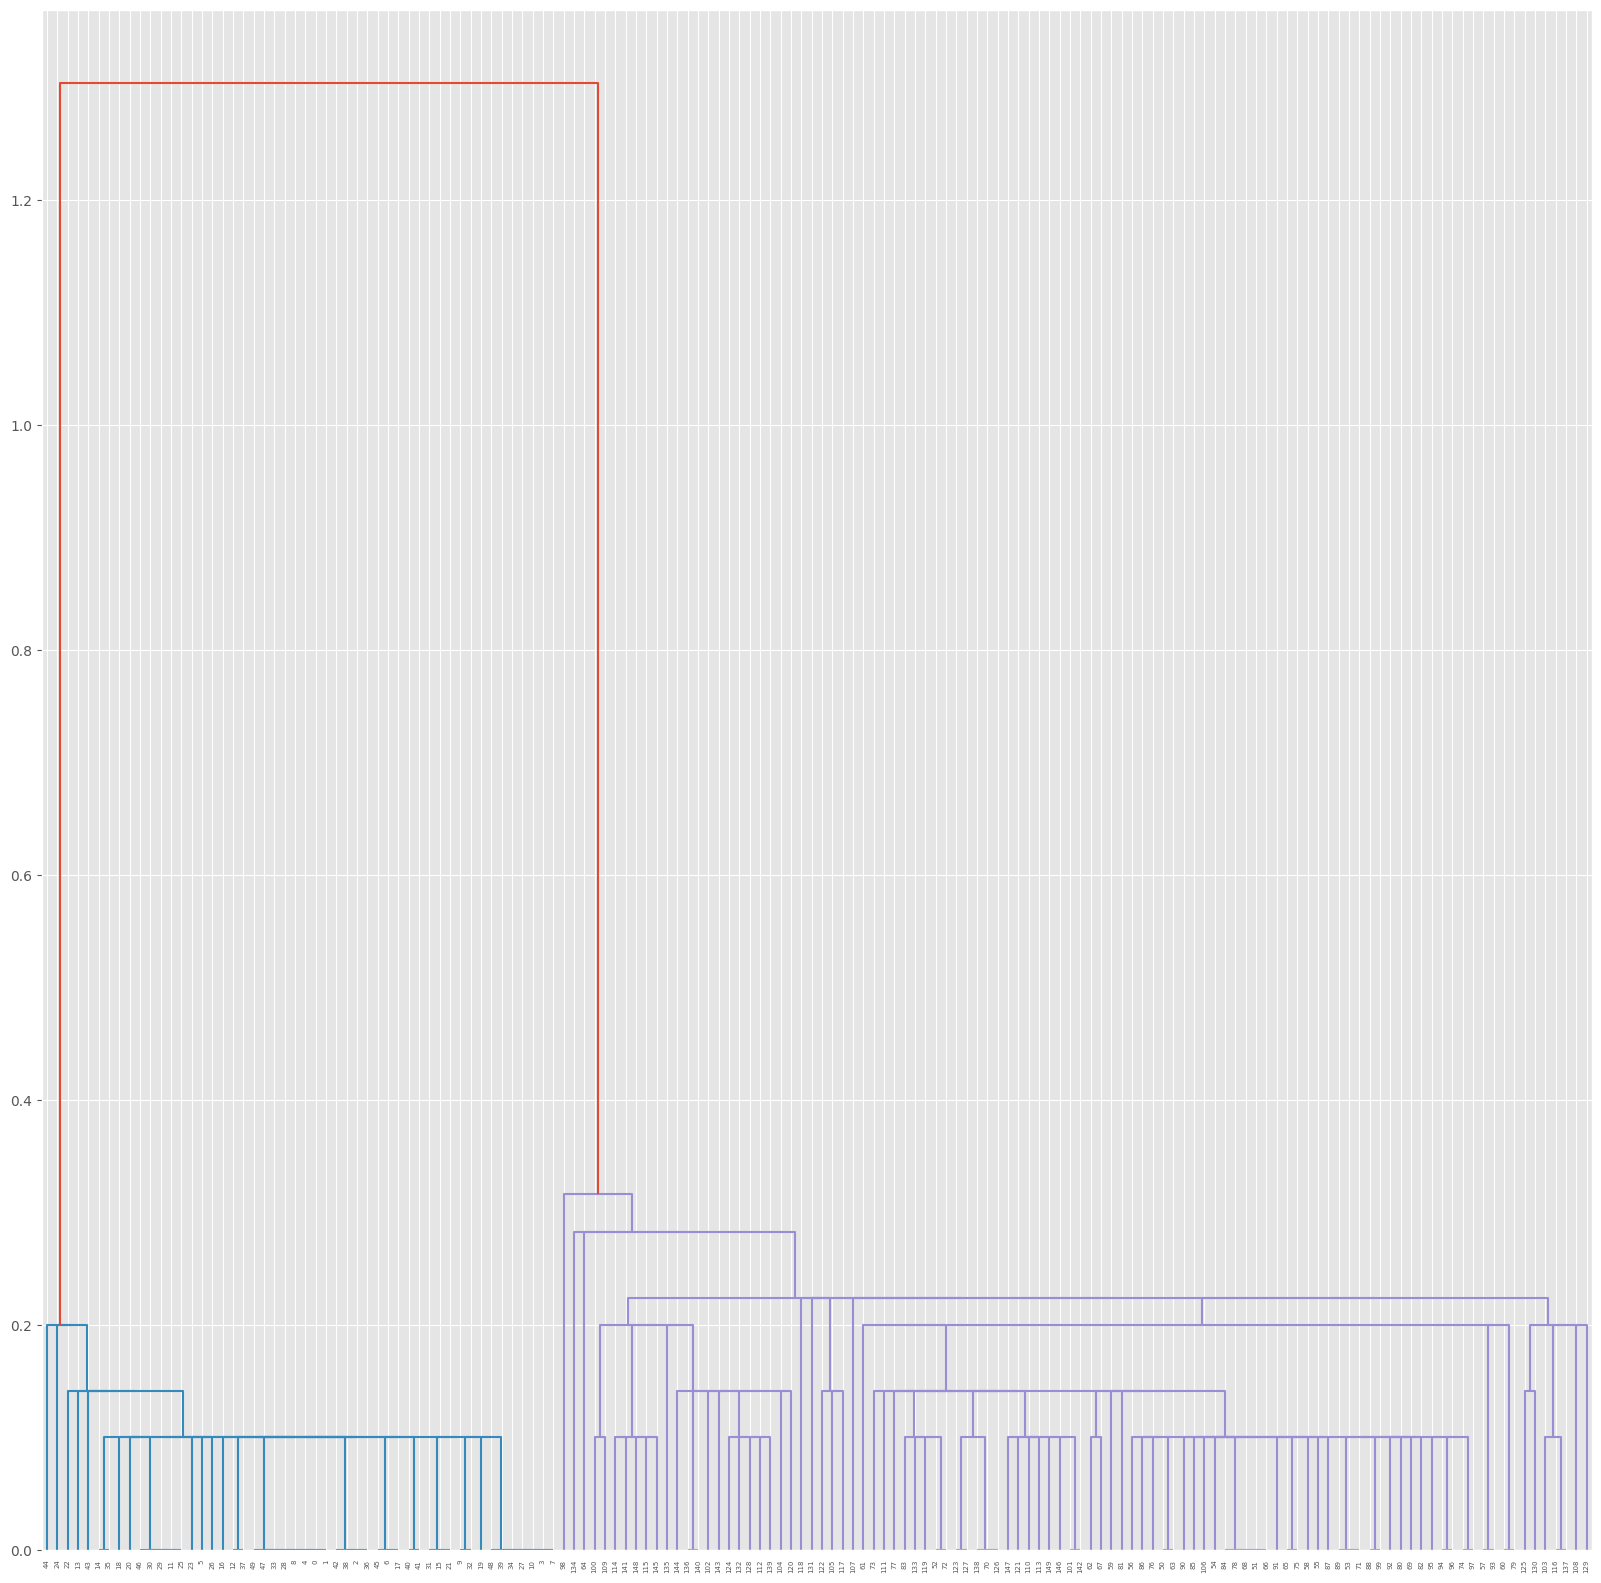

In [44]:
#linkage = k평균군집화에 거리를 계산하는 방식을 설정
from scipy.cluster import hierarchy
hierar = hierarchy.linkage(iris_data_pd.iloc[:,2:4], 'complete')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

hierar = hierarchy.linkage(iris_data_pd.iloc[:,2:4], 'single')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

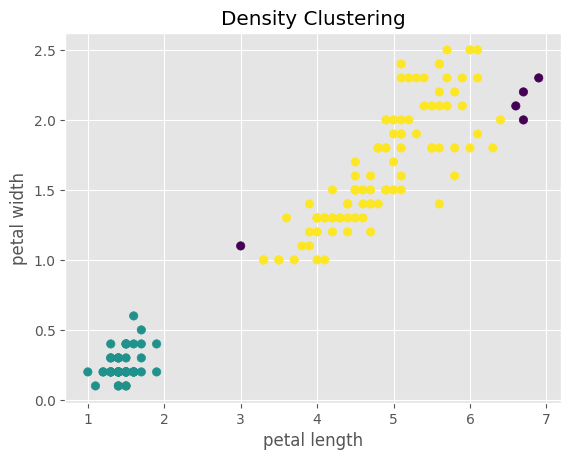

In [45]:
# eps=거리, min_samples= eps 거리 내에서 이루어지는 군집의 최소 필요갯수
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.5, min_samples=10)
db.fit(iris_data_pd.iloc[:,2:4])
y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3],c=y_pred)
plt.title('Density Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [46]:
db.labels_
# -1은 군집에 들지 못한 데이터

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


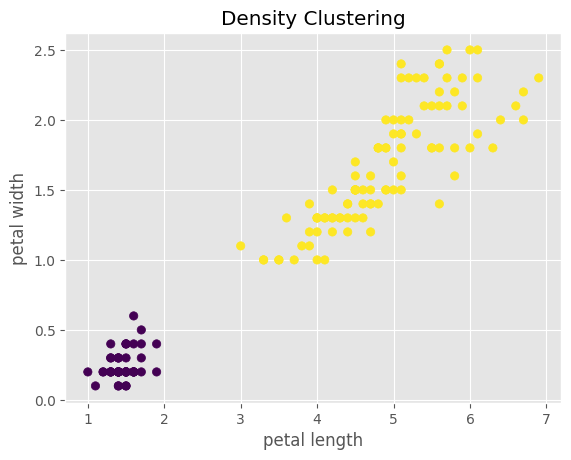

In [47]:
db.set_params(eps = 0.5, min_samples= 5)
y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
print(db.labels_)
plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3],c=y_pred)
plt.title('Density Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()